<a href="https://colab.research.google.com/github/raodnik/ML/blob/main/Image_Compression_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os


In [2]:
plt.rcParams['figure.figsize']=[16,8]

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
A=imread('/content/drive/MyDrive/Datasets/cat.jpg')
X=np.mean(A, -1);

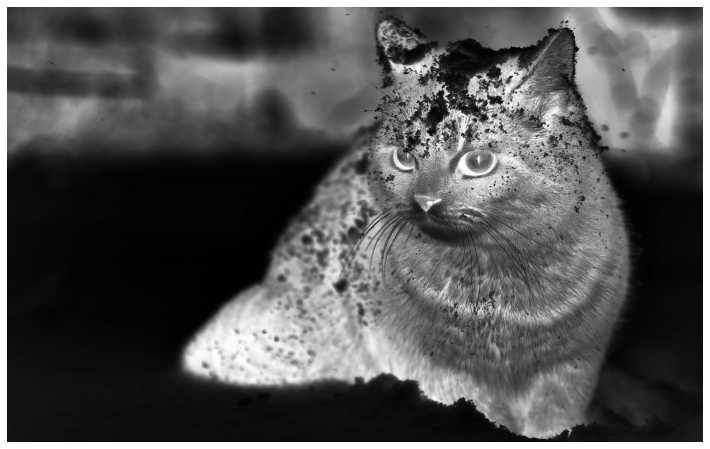

In [9]:
img = plt.imshow(256-X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [10]:
#SVD

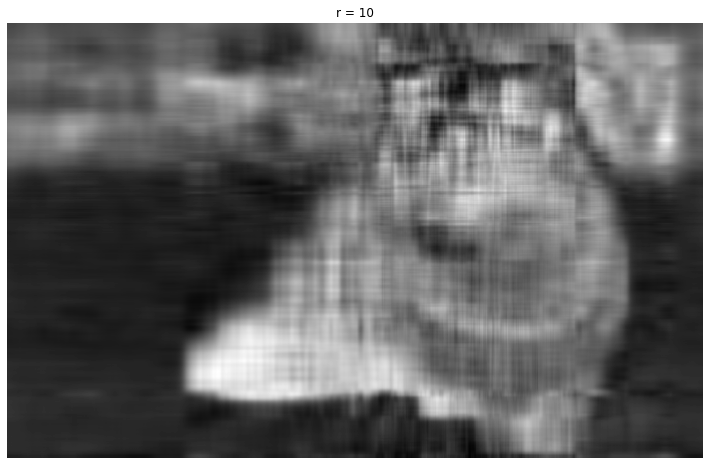

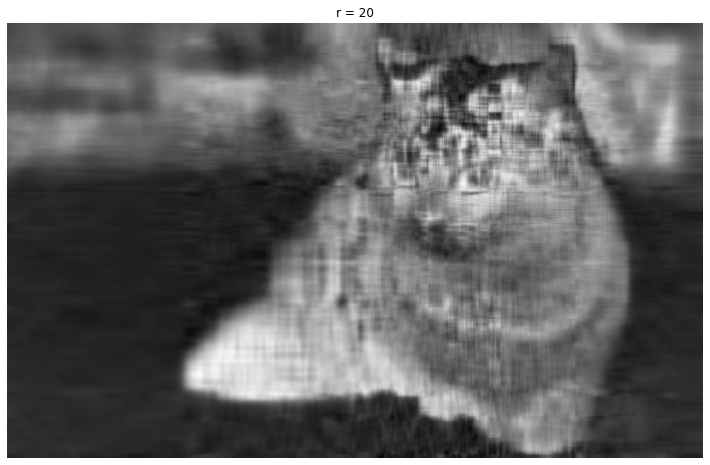

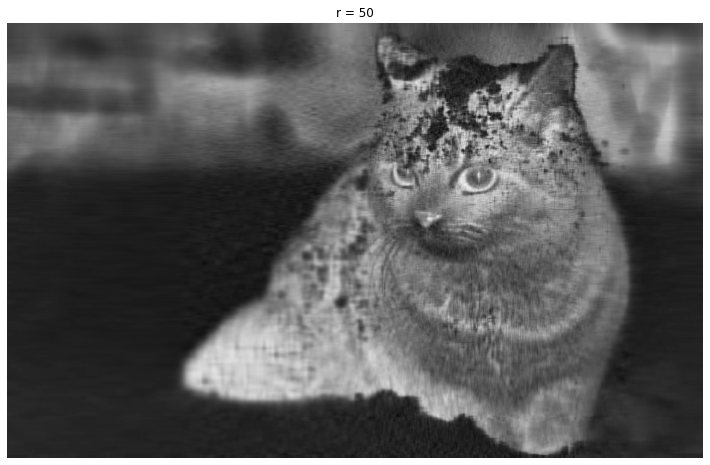

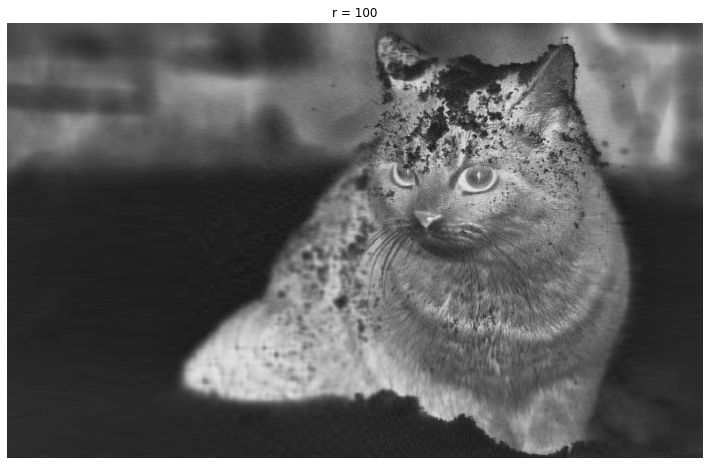

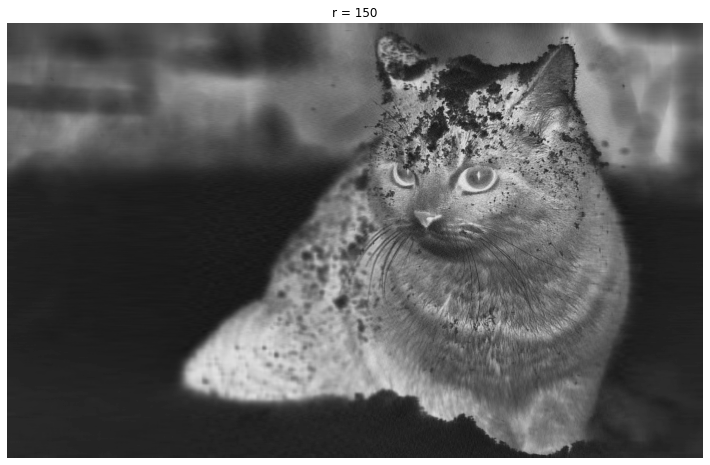

In [31]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S=np.diag(S)

i=0
for  r in (10,20,50,100,150):
  #Construct the Approximate image
  Xapprox = U[:,:r] @ S[:r,:r] @ VT[:r,:]
  plt.figure(i+1)
  i += 1
  img = plt.imshow(256-Xapprox)
  img.set_cmap('gray')
  plt.axis('off')
  plt.title('r = ' + str(r))
  plt.show()


In [18]:
X[1000,1001]

255.0

In [19]:
Xapprox

array([[198.44328008, 198.43449819, 198.30527226, ..., 189.77371307,
        188.95865339, 188.37750627],
       [198.54393256, 198.53142885, 198.40602999, ..., 189.87871011,
        189.06505914, 188.48422435],
       [198.66331019, 198.64608043, 198.51930429, ..., 190.00914349,
        189.19926889, 188.62378724],
       ...,
       [238.89452738, 238.77964685, 238.3635066 , ..., 231.76104315,
        231.64563643, 231.40461697],
       [238.9370946 , 238.82147543, 238.40481163, ..., 231.89626158,
        231.7842031 , 231.54493965],
       [238.89371165, 238.77964316, 238.36359361, ..., 232.00719275,
        231.90103893, 231.66378747]])

In [20]:
X

array([[205.66666667, 205.66666667, 205.66666667, ..., 196.66666667,
        195.66666667, 194.66666667],
       [205.66666667, 205.66666667, 205.66666667, ..., 197.66666667,
        196.66666667, 194.66666667],
       [205.66666667, 205.66666667, 205.66666667, ..., 197.66666667,
        196.66666667, 195.66666667],
       ...,
       [235.66666667, 235.66666667, 234.66666667, ..., 225.66666667,
        225.66666667, 225.66666667],
       [235.66666667, 235.66666667, 234.66666667, ..., 225.66666667,
        225.66666667, 225.66666667],
       [235.66666667, 235.66666667, 234.66666667, ..., 225.66666667,
        225.66666667, 225.66666667]])

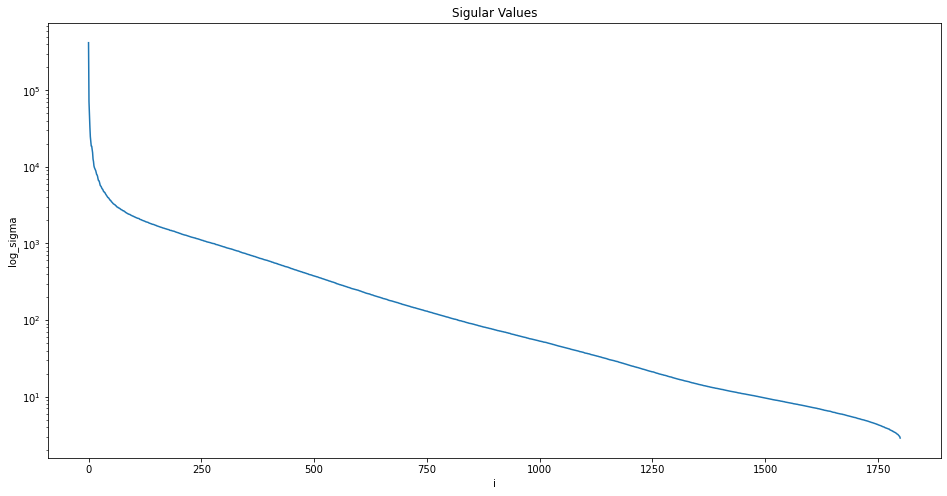

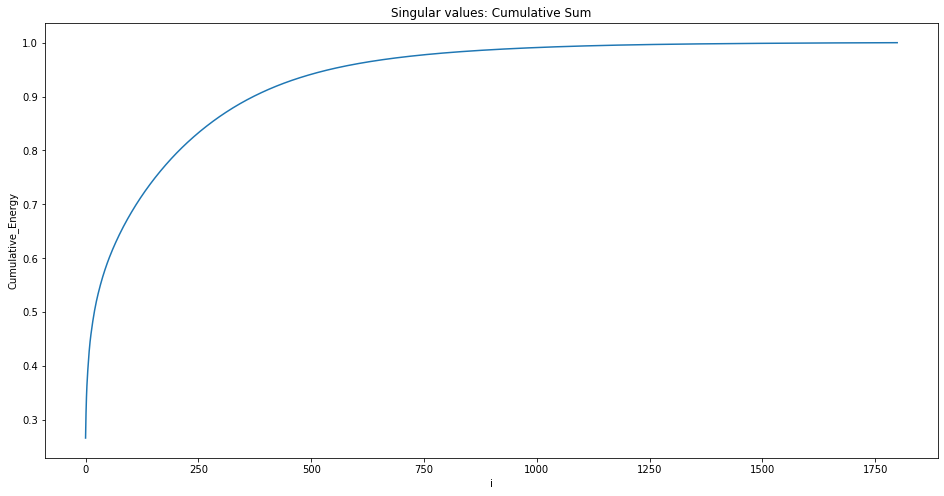

In [32]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Sigular Values')
plt.xlabel('i')
plt.ylabel('log_sigma')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular values: Cumulative Sum')
plt.xlabel('i')
plt.ylabel('Cumulative_Energy')
plt.show()